## Task: Manual search
Jobsity is part of a global community named [Endeavor](https://endeavor.org/). Please find companies on the Endeavor network that have received funding in the last 12 months (seed, series A, B, C, etc...) and the amount that they received. 
Bonus: Find the CEO and CTO of the companies and their headquarters.

Note: You need to explain the process you used to find this info. I will be expecting the repo link and the video.

<br>

---



## First Approach
By manually browsing https://endeavor.org/ we find a list of the [entrepreneur companies](https://endeavor.org/entrepreneur-companies) that seem to be over 1000.
We also get to read about Endeavor Catalyst, te co-investment fund through which the company funds Startups, as they are listed [here](https://endeavor.org/catalyst)

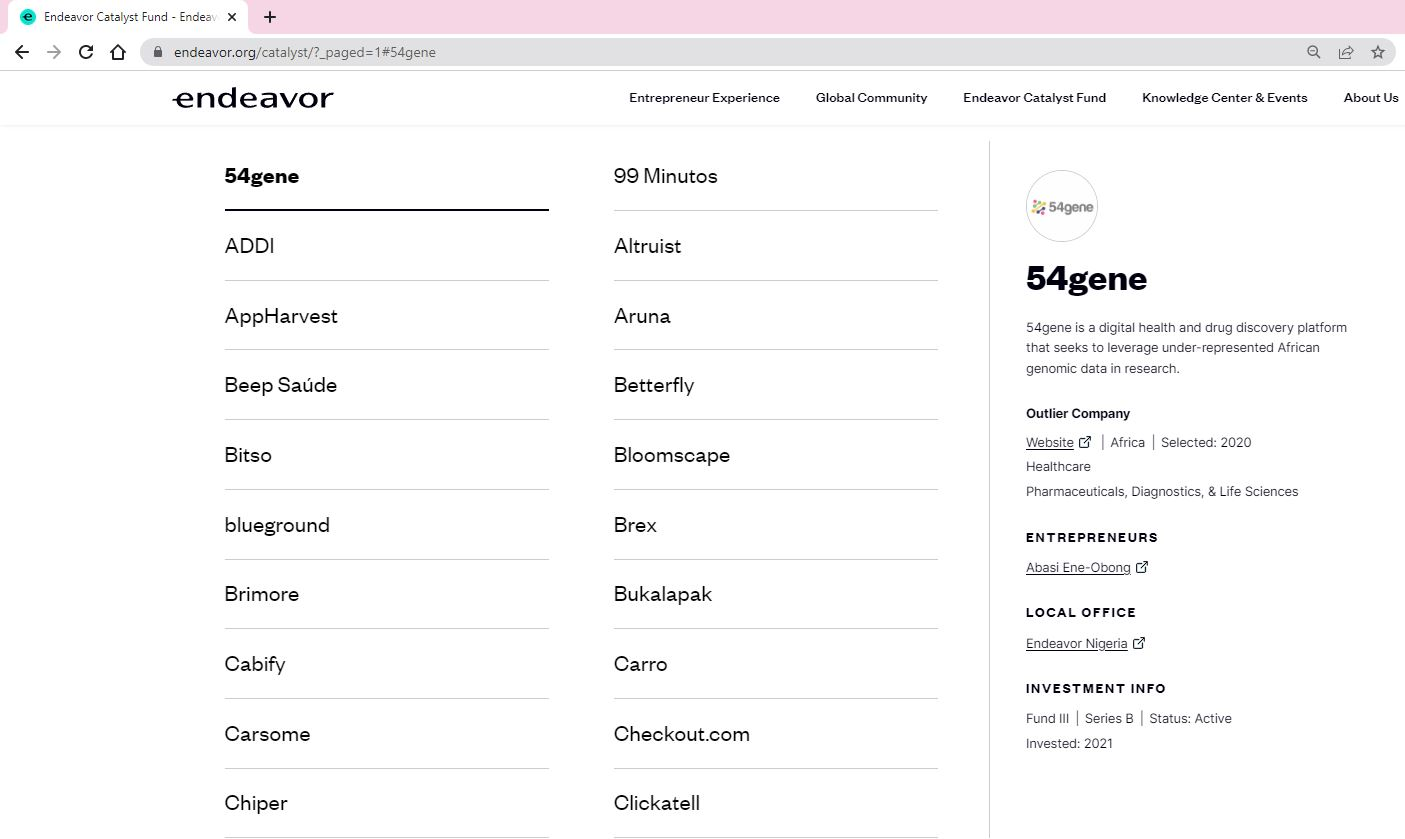

In [1]:
#we begin by importing a few useful libraries
import pandas as pd
import requests
from bs4 import BeautifulSoup
from time import sleep
import re
import random

In [2]:
#this reduced user agent list might be useful later when crawling sites without a VPN

user_agent_list = [
'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/70.0.3538.77 Safari/537.36',
'Mozilla/5.0 (X11; Ubuntu; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/55.0.2919.83 Safari/537.36',
'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_8_3) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/54.0.2866.71 Safari/537.36',
'Mozilla/5.0 (X11; Ubuntu; Linux i686 on x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/53.0.2820.59 Safari/537.36',
'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_2) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/52.0.2762.73 Safari/537.36',
'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_8_4) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/49.0.2656.18 Safari/537.36',
'Mozilla/5.0 (Windows NT 6.2; WOW64) AppleWebKit/537.36 (KHTML like Gecko) Chrome/44.0.2403.155 Safari/537.36',
'Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/41.0.2228.0 Safari/537.36',
'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_10_1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/41.0.2227.1 Safari/537.36',
'Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/41.0.2227.0 Safari/537.36']

In [3]:
#this is where we will save the catalyst startups
df = pd.DataFrame()

for i in range(0,12):
  url = "https://endeavor.org/catalyst/?_paged=" + str(i+1)

  user_agent = random.sample(user_agent_list,1)[0]
  page = requests.get(url, timeout=5,headers = {'User-Agent': user_agent})
  if(not page.ok):
    raise Exception("url broken\t" + str(url) + "\ncode: " + str(page.page.status_code))

  #this sleep is a naive way to avoid triggering a DNS block on our IP
  sleep(round( random.uniform(1, 5), 2 ) )

  soup = BeautifulSoup(page.text, 'html.parser')
  items = soup.find_all("div", {"class": 'company-details-inner'})

  if(not items):
    raise Exception("no items in current page")
  for item in items:
      #we save useful spans, but also the raw info itself on "info" just in case
      item_name = item.h2.text
      item_url = item.a['href']
      loca = ' '.join( a.text + ',' for a in item.find_all("span", {"class": 'local-office'}) )[:-1]
      entre = ' '.join( a.text + ',' for a in item.find_all("span", {"class": 'entrepreneur'}) )[:-1]
      fund = ' '.join( a.text + ',' for a in item.find_all("span", {"class": 'fund'}) )[:-1]
      fround = ' '.join( a.text + ',' for a in item.find_all("span", {"class": 'financing-round'}) )[:-1]
      status = ' '.join( a.text + ',' for a in item.find_all("span", {"class": 'status'}) )[:-1]
      year = ' '.join( a.text + ',' for a in item.find_all("span", {"class": 'year-invested'}) )[:-1]

      aux = pd.DataFrame([{'name':item_name,'url':item_url,'loca':loca, \
                          'entre':entre, 'fund':fund, 'fround':fround, \
                          'status':status, 'year':year, 'info':item}])
      df = pd.concat([df,aux], ignore_index = True)


In [4]:
df.shape

(240, 9)

In [5]:
df.head(5)

,name,url,loca,entre,fund,fround,status,year,info
0,54gene,https://54gene.com,Endeavor Nigeria,\n\n\t\t\t\t \t\t\t\t\tAbasi Ene-Obon...,Fund III,Series B,Status: Active,Invested: 2021,"[\n, [54gene], \n, [[<span data-sheets-userfor..."
1,99 Minutos,https://mx.99minutos.com/,Endeavor Mexico,\n\n\t\t\t\t \t\t\t\t\tAlexis Patjane\n,Fund III,Series B,Status: Active,Invested: 2021,"[\n, [99 Minutos], \n, [[<span data-sheets-use..."
2,ADDI,https://addi.com/,Endeavor Colombia,\n\n\t\t\t\t \t\t\t\t\tDaniel Vallejo...,,,,,"[\n, [ADDI], \n, [[<span data-sheets-userforma..."
3,Altruist,https://altruist.com/,Endeavor Detroit,\n\n\t\t\t\t \t\t\t\t\tJason Wenk\n,Fund II,Series A,Status: Active,Invested: 2018,"[\n, [Altruist], \n, [[<span data-sheets-userf..."
4,AppHarvest,http://www.appharvest.co/,"Endeavor Detroit , Endeavor Louisville",\n\n\t\t\t\t \t\t\t\t\tJonathan Webb\n,Fund III,Series C,Status: Active,Invested: 2020,"[\n, [AppHarvest], \n, [[<span data-sheets-use..."


In [6]:
df.to_csv("raw_backup.csv")

We can see that we got 240 companies, and 8 useful datapoints for each company.<br>But we may want to clean up the entrepreneur's names and the year column

In [7]:
df['entre'] = df.entre.apply(lambda x: re.sub(r'[\t\n\x0b\r\f]', '', str(x)))
df['status'] = df.status.apply(lambda x: x[8:])
df['year'] = df.year.apply(lambda x: x[-4:])

In [8]:
df[['name', 'url', 'loca', 'entre', 'fund', 'fround', 'status', 'year']].head(5)

,name,url,loca,entre,fund,fround,status,year
0,54gene,https://54gene.com,Endeavor Nigeria,Abasi Ene-Obong,Fund III,Series B,Active,2021
1,99 Minutos,https://mx.99minutos.com/,Endeavor Mexico,Alexis Patjane,Fund III,Series B,Active,2021
2,ADDI,https://addi.com/,Endeavor Colombia,"Daniel Vallejo , Santiago ...",,,,
3,Altruist,https://altruist.com/,Endeavor Detroit,Jason Wenk,Fund II,Series A,Active,2018
4,AppHarvest,http://www.appharvest.co/,"Endeavor Detroit , Endeavor Louisville",Jonathan Webb,Fund III,Series C,Active,2020


The dataframe looks a lot cleaner now, we can filter the companies that recieved funding in the last 12 months (year should be 2022 or 2023) 

In [9]:
df.year.value_counts()

2021    55
2020    33
        31
2019    31
2018    30
2017    18
2016    12
2022     9
2014     8
2015     5
2013     4
2012     3
2011     1
Name: year, dtype: int64

In [10]:
df.fund.value_counts()

Fund III    101
Fund II      69
Fund I       36
             30
Fund IV       4
Name: fund, dtype: int64

In [11]:
filtered = df[['name', 'url', 'loca', 'entre', 'fund', 'fround', 'status', 'year']][(df['year'] == '2022')|(df['year'] == '2023')]
filtered

,name,url,loca,entre,fund,fround,status,year
19,Clickatell,http://www.clickatell.com,Endeavor South Africa,Pieter de Villiers,Fund IV,Series C,Active,2022
42,Gupy,http://www.gupy.com.br,Endeavor Brazil,"Mariana Dias , Robson Rodr...",Fund III,Series B,Active,2022
77,Paack,https://paack.co/,Endeavor Spain,"Fernando Benito , Xavier R...",Fund III,Series D+,Active,2022
79,Payhawk,https://payhawk.com/,Endeavor Bulgaria,Hristo Borisov,Fund IV,Series B,Active,2022
100,Tyme,https://www.tymebank.co.za/,Endeavor South Africa,"Coen Jonker , Nathaniel Cl...",Fund III,Series B,Active,2022
105,Wayflyer,https://www.wayflyer.com,Endeavor Ireland,Aidan Corbett,Fund III,Series B,Active,2022
124,Apollo Agriculture,http://www.apolloagriculture.com/,Endeavor Kenya,"Eli Pollak , Benjamin Njenga",Fund IV,Series A,Active,2022
163,Inspectorio,https://www.inspectorio.com,Endeavor Ecuador,"Fernando Moncayo , Carlos...",Fund IV,Series B,Active,2022
239,Zippedi Inc.,http://www.zippedi.com/,Endeavor Chile,Luis Vera,Fund III,Series A,Active,2022


In [12]:
df[['name', 'url', 'loca', 'entre', 'fund', 'fround', 'status', 'year']][(df['fund'] == 'Fund IV')]

,name,url,loca,entre,fund,fround,status,year
19,Clickatell,http://www.clickatell.com,Endeavor South Africa,Pieter de Villiers,Fund IV,Series C,Active,2022
79,Payhawk,https://payhawk.com/,Endeavor Bulgaria,Hristo Borisov,Fund IV,Series B,Active,2022
124,Apollo Agriculture,http://www.apolloagriculture.com/,Endeavor Kenya,"Eli Pollak , Benjamin Njenga",Fund IV,Series A,Active,2022
163,Inspectorio,https://www.inspectorio.com,Endeavor Ecuador,"Fernando Moncayo , Carlos...",Fund IV,Series B,Active,2022


As there are only 9 companies that seem to have recieved funds in 2022 
we can manually search for the exact date and amount.

In [13]:
for index, row in filtered.iterrows():
  print('https://www.google.com/search?q='+  re.sub(r'\s', '+', str(row['name'])) + '+endeavor+fund')

https://www.google.com/search?q=Clickatell+endeavor+fund
https://www.google.com/search?q=Gupy+endeavor+fund
https://www.google.com/search?q=Paack+endeavor+fund
https://www.google.com/search?q=Payhawk+endeavor+fund
https://www.google.com/search?q=Tyme+endeavor+fund
https://www.google.com/search?q=Wayflyer+endeavor+fund
https://www.google.com/search?q=Apollo+Agriculture+endeavor+fund
https://www.google.com/search?q=Inspectorio+endeavor+fund
https://www.google.com/search?q=Zippedi+Inc.+endeavor+fund


If we where to rely on the first couple of google search result headlines, the finished table would be as it follows:

| Name  | Amount  | Date  | Source  |
|---|---|---|---|
| Clickatell  |  91M | 22/02/22  |  [link](https://techcrunch.com/2022/02/22/clickatell-raises-91m-to-scale-its-chat-commerce-platform-and-us-expansion/) | 
| Gupy  | 93M  | 31/01/22  | [link](https://www.beyondthelaw.news/hrtech-gupy-raises-93-million-led-by-softbank-and-riverwood/)  |
|  Paack | 225M  | 26/01/22  | [link](https://elreferente.es/inversiones/paack-cierra-ronda-financiacion-serie-d-225m-liderada-softbank-vision-fund-2/)  |
| Payhawk   | 100M  | 01/03/22  |  [link](https://payhawk.com/blog/payhawk-becomes-first-ever-bulgarian-unicorn-after-raising-100m-in-a-lightspeed-led-series-b-extension) |
| Tyme  | -  |  01/01/22 | [link](https://www.crunchbase.com/funding_round/tyme-series-b--c81a2225) |
| Wayflyer   | 150M  | 01/02/22  | [link](https://www.crunchbase.com/funding_round/wayflyer-series-b--e76f7454)  |
|  Apollo Agriculture |  40M |  21/03/22 | [link](https://techcrunch.com/2022/03/21/kenya-based-agritech-apollo-raises-40-million-in-softbank-led-round-joined-by-chan-zuckerberg-initiative-cdc/)  |
| Inspectorio  | 48.2M  |  31/01/22 | [link](https://pitchbook.com/profiles/company/165969-37#overview) & [link](https://www.forbes.com/sites/rebeccaszkutak/2022/01/31/inspectorio-raises-50-million-to-help-brands-ensure-quality-in-their-supply-chain/amp/)  |
| Zippedi Inc.  | 12.5M  | 28/04/22  | [link](https://apnews.com/article/business-lifestyle-shopping-26e8afc7d6665d429e3e7d6854e2226e)  |

In [15]:
filtered['CEO'] = filtered['entre'].apply(lambda x: x.split(',')[0] )

In [17]:
filtered.to_csv("filtered_data.csv")

## Paid Sources
Given the fact that I'm not familiarized with the field and do not have access to the "correct" data from trusted sources. If the data provided above wasn't correct I would propose considering paid datasets. With this exploratory analysis I came across two dataset that seem promising.

Of course the decision of using paid sources or correcting the above shown method would depend on the frequency that we need this information updated + verifying that the sources themselves are reliable

Two possible sources:

*   https://unicorn-nest.com/funds/endeavor-catalyst/
*   https://golden.com/wiki/Endeavor_Catalyst-4NAEN34



## Extra data | Entrepreneur Companies
We can actually get more information about Endeavor and it's Entrepreneur Companies re-utilizing most of the same code shown above. If we where compiling all the data we could about the Endeavor network, scrapping all the companies might prove useful.

In [ ]:
df2 = pd.DataFrame()

for i in range(0,53):
  url = "https://endeavor.org/entrepreneur-companies/?_paged=" + str(i+1)

  user_agent = random.sample(user_agent_list,1)[0]
  page = requests.get(url, timeout=5,headers = {'User-Agent': user_agent})
  if(not page.ok):
    raise Exception("url broken\t" + str(url) + "\ncode: " + str(page.page.status_code))

  #this sleep is a naive way to avoid triggering a DNS block on our IP
  sleep(round( random.uniform(1, 5), 2 ) )

  soup = BeautifulSoup(page.text, 'html.parser')
  items = soup.find_all("div", {"class": 'company-details-inner'})

  if(not items):
    raise Exception("no items in current page")
  for item in items:
      item_name = item.h2.text
      if( item.a ):
        item_url = item.a['href']
      loca = ' '.join( a.text + ',' for a in item.find_all("span", {"class": 'local-office'}) )[:-1]
      entre = ' '.join( a.text + ',' for a in item.find_all("span", {"class": 'entrepreneur'}) )[:-1]
      info = ' '.join( a.text + ',' for a in item.find_all("span", {"class": 'company-description'}) )[:-1]

      aux = pd.DataFrame([{'name':item_name,'url':item_url,'loca':loca, \
                          'entre':entre, 'info':info}])
      df2 = pd.concat([df2,aux], ignore_index = True)


In [ ]:
df2['entre'] = df2.entre.apply(lambda x: re.sub(r'[\t\n\x0b\r\f]', '', str(x)))

In [ ]:
df2.shape

(1047, 5)

In [ ]:
df2.sample(5)

,name,url,loca,entre,info
48,CyberGRX,https://www.cybergrx.com/,Endeavor Colorado,Fred Kneip,CyberGRX provides enterprises and their third ...
355,CloudEats,https://www.cloudeats.com/,Endeavor Philippines,"Kimberly Yao , Iacopo Rovere",CloudEats is the leading cloud kitchen player ...
815,Puppis,https://www.puppis.com.ar/,Endeavor Colombia,"Pipa Nogaró , Andrés Ferná...",Puppis is building the premier pet and pet-par...
397,DataEQ,http://www.brandseye.com,Endeavor South Africa,"Nic Ray , Craig Raw","DataEQ, formerly known as BrandsEye, specializ..."
1011,Welle Laser,http://wellelaser.com/,Endeavor Brazil,"Rafael Bottós , Gabriel Ma...",Welle Laser produces advanced fiber-optic lase...


In [ ]:
df2.to_csv("raw_entrepreneur.csv")